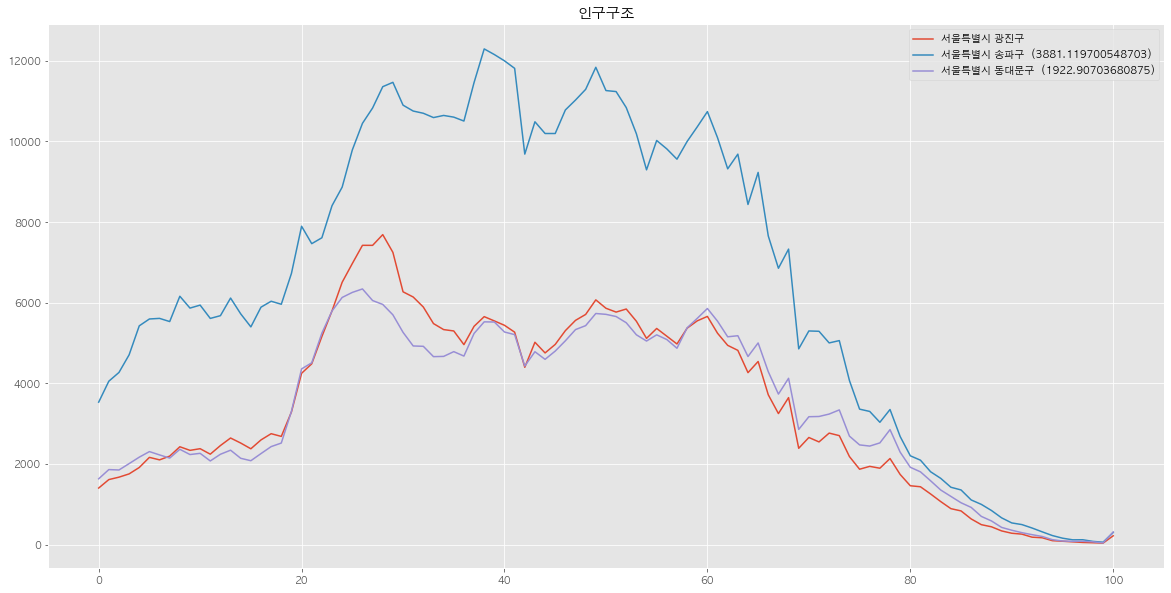

In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams["figure.figsize"]=(20,10)



all = pd.read_csv('seoul_ingoo.csv',encoding='cp949')


g = all.iloc[5,4:]
g_goo_name = all.iloc[5,1]
g_arr = g.to_numpy()
for i in range(0,len(g_arr)):
    g_arr[i] = g_arr[i].replace(",","")
    g_arr[i] = float(g_arr[i])
    
max_arr = np.zeros(101)
min_arr = np.zeros(101)
sum_arr = np.zeros(len(all))

max_index = 1
min_index = 1

for i in range(0,len(all)):
    if i!=5:
        other = all.iloc[i,4:] # 광진구 제외한 다른 구 의 0세부터 100세이상까지 인구수 
        other_arr = other.to_numpy()
        sum = 0
        for j in range(0,len(other_arr)):
            other_arr[j] = other_arr[j].replace(",","")
            other_arr[j] = float(other_arr[j])
            sum+=(other_arr[j]-g_arr[j])**2
        sum_arr[i] = sum    
        if i>=2:
            if sum_arr[max_index]<=sum_arr[i]:
                max_index = i
                max_arr = other_arr
            if sum_arr[min_index]>=sum_arr[i]:
                min_index = i
                min_arr = other_arr

min_goo_name = all.iloc[min_index,1]
max_goo_name = all.iloc[max_index,1]

min_goo_std = np.std(min_arr)
max_goo_std = np.std(max_arr)

min_goo_label = min_goo_name +' ('+str(min_goo_std)+')'
max_goo_label = max_goo_name +' ('+str(max_goo_std)+')'

plt.style.use('ggplot')
plt.title("인구구조")
plt.plot(g_arr,label = g_goo_name)
plt.plot(max_arr,label = max_goo_label)
plt.plot(min_arr,label = min_goo_label)
plt.legend()
plt.show()